# CYPLAN255
### Urban Informatics and Visualization

HIT RECORD and TRANSCRIBE

# Lecture 16 -- Network Analysis
******
March 28, 2022

<img src="https://s2.glbimg.com/J-25mCP-cFAvRrptFD-RDJY8O2M=/0x0:1008x1043/1008x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2021/H/s/UoNwPLQmOVFCQyTJIFBQ/19chuva.jpg" width=500 align='right' title='Crianças na chuva. Carla Vieira, 2021.'>

# Agenda
1. Announcements
2. Why networks?
3. Pandana
4. OSMnx
5. For next time
6. Questions


# 1. Announcements

- None!

# 2. Network data: not just for transportation planning!

## 2.1. Review: Berkeley BART distances

If you made it to the end of the lecture 14 notebook, you would have seen this image:
<img src="images/berkeley_bart.png">

This was the final step in a geopandas workflow in which we computed distance to the nearest BART station for every Census Block in Berkeley. If you didn't get that far in the notebook, it would be a good idea to spend some time working through it on your own.

## 2.2. Accessibility

- Our investigation of distance-to-BART investigation is a rudimentary example of accessibility analysis
- **Accessibility** is a very important, but broadly defined, topic in land use and transportation planning
- In general, accessibility is a conceptual framework for thinking about:
  - distribution of amenities/opportunities in space
  - relative ease/difficulty of reaching these resources
  - equity/justice-oriented issues relating to the built environment

**Question:** How do you measure accessibility?

- There is no one right way:
  - Attribute of what?
      - geography
      - population
  - Aggregate or singular?
    - one-to-one (e.g. shortest path)
    - many-to-one (e.g. nearest neighbor)
    - one-to-many (e.g. cumulative opportunities)
  - Unit of measure?
    - impedances (e.g. distance, time, cost)
    - density

**Question:** What made the BART distance analysis "rudimentary"?

A more realistic approach would make use of the geometries of the paths that people actually traverse.

## 2.3. Cue...networks!

<img src="https://biohaviour.com/wp-content/uploads/2020/11/SlimeMold.gif" align="right">

- Networks are most commonly used to describe relationships between interconnected entities
    - incredibly useful for measuring accessibility
- Offers abstract representation of both
  1. the distribution of things in relation to some exogenously defined reference
     - e.g. coordinates in a CRS
  2. characteristics of the paths that connect them
     - e.g. impedances, geometries
- In network parlance these entities are called **nodes** and **edges**, respectively. Together, these comprise a data structure known as a **network graph**

- For more, see CYPLAN 290 -- Urban Systems and Network Science (Prof. Marta Gonzalez)

## 2.4. Transportation Networks

### 2.4.1. Characteristics
- Typically modeled with intersections as the nodes and segments between intersections as the edges
- Can be mode-specific -- i.e. walk, bike, drive, transit
- Can be hierarchical -- i.e. freeway vs. local roads

### 2.4.2. Data, where?

- [OpenStreetMap](https://wiki.osmfoundation.org/wiki/Main_Page)
  - Open source, crowdsourced catalog of global transportation network data
    - streets, bike lanes, sidewalks (!)
  - Extras: administrative boundaries, place names, addresses (geocoding), turn-by-turn routing, trip planning, map tiles, building footprints, traffic control
- [Transit.land](https://www.transit.land/) for GTFS data
  - Generalized Transit Feed Specification 
  - Stations, schedules, etc.
    
  

# 3. Pandana: Pandas for Network Analysis

Here we demonstrate the main features of the Pandana library, a Python package for network analysis that uses a fancy algorithm called contraction hierarchies to calculate super-fast travel accessibility metrics and shortest paths.

See full documentation here: http://udst.github.io/pandana/

## 3.1. Loading data

Note: you may need to install OSMnet if Python complains in the next cell:
- `conda install osmnet` or  `pip install osmnet`

In [12]:
pip install osmnet

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pandana

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandana
from pandana.loaders import osm
import warnings
###warnings.filterwarnings('ignore')

In [15]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda install -c conda-forge geopandas=0.10

In [16]:
network = osm.pdna_network_from_bbox(37.698, -122.517, 37.819, -122.354)  # San Francisco, CA
network.set_geometry()

ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Use GeoDataFrame.set_geometry to set the active geometry column.

## 3.2. Exploring the data

Edges and nodes are visible as DataFrames.

In [17]:
network.nodes_df.head()

NameError: name 'network' is not defined

In [18]:
network.edges_df.head()

NameError: name 'network' is not defined

## 3.3. Reading/Writing to disk

You can't directly save a Pandana network object, but you can easily recreate it from the nodes and edges.

In [19]:
network.nodes_df.to_csv('nodes.csv')
network.edges_df.to_csv('edges.csv')

NameError: name 'network' is not defined

In [20]:
nodes = pd.read_csv('nodes.csv', index_col=0)
edges = pd.read_csv('edges.csv', index_col=[0,1])

FileNotFoundError: [Errno 2] No such file or directory: 'nodes.csv'

In [21]:
network = pandana.Network(nodes['x'], nodes['y'], 
                          edges['from'], edges['to'], edges[['distance']])

NameError: name 'nodes' is not defined

## 3.4. Computing shortest paths

Lets download the location of San Francisco restaurants listed on OSM, and then calculate some shortest paths between them.

In [22]:
restaurants = osm.node_query(
    37.698, -122.517, 37.819, -122.354, tags='"amenity"="restaurant"')

In [23]:
restaurants

,lat,lon,amenity,cuisine,name,wheelchair,addr:housenumber,addr:street,addr:city,addr:postcode,...,changing_table:location,brewery,leisure,strapline,noname,short_name,contact:youtube,contact:tripadvisor,was:contact:facebook,website:orders
id,,,,,,,,,,,,,,,,,,,,,
286132370,37.799551,-122.437048,restaurant,Diner,Mel's Drive-in,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302449219,37.764731,-122.422983,restaurant,NaN,Monk's Kettle,NaN,3149,16th Street,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317081652,37.785464,-122.407152,restaurant,steaks_and_seafood,John's Grill Live Jazz,NaN,63,Ellis Street,San Francisco,94102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317124793,37.781426,-122.387807,restaurant,NaN,Java House Breakfast and Lunch,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317124800,37.781922,-122.387865,restaurant,NaN,Carmen's Pier 40 Restaurant,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9583974523,37.779436,-122.410421,restaurant,NaN,Birdsong,NaN,1085,Mission Street,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9589058958,37.781625,-122.416715,restaurant,mexican,Taqueria El Castillo,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9593474648,37.786494,-122.413013,restaurant,filipino;japanese,Ox & Tiger,NaN,552,Jones Street,San Francisco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Choose two at random and find the closest network nodes to each one:

In [24]:
res = restaurants.sample(2)
res

,lat,lon,amenity,cuisine,name,wheelchair,addr:housenumber,addr:street,addr:city,addr:postcode,...,changing_table:location,brewery,leisure,strapline,noname,short_name,contact:youtube,contact:tripadvisor,was:contact:facebook,website:orders
id,,,,,,,,,,,,,,,,,,,,,
1230343417,37.731759,-122.405535,restaurant,mexican,Cinco de Mayo Taquería,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259746590,37.775342,-122.426258,restaurant,NaN,Mazzat,NaN,501,Fell Street,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
res1, res2 = network.get_node_ids(res.lon, res.lat).values

NameError: name 'network' is not defined

Then use the traverse the network to find the shortest path between them:

In [26]:
network.shortest_path(res1, res2)

NameError: name 'network' is not defined

In [27]:
network.shortest_path_length(res1, res2)

NameError: name 'network' is not defined

NOTE: Watch your units!

## 3.5 Calculate many shortest paths at once

Pandana can generate several million shortest paths in ~1 minute.

In [28]:
restaurant_nodes = network.get_node_ids(restaurants.lon, restaurants.lat).values

origs = [o for o in restaurant_nodes for d in restaurant_nodes]
dests = [d for o in restaurant_nodes for d in restaurant_nodes]

NameError: name 'network' is not defined

In [29]:
%%time
distances = network.shortest_path_lengths(origs, dests)

NameError: name 'network' is not defined

Now we have the distance from each restaurant to each other restaurant.

In [30]:
import pandas as pd
pd.Series(distances).describe()

NameError: name 'distances' is not defined

## 3.6. Proximity (a.k.a. nearest neighbor)

Here our goal is to find the closest restaurants to each node on the network. Perhaps we are hungrier than we are picky.

To do a network-wide calculation like this, we first need to formally add the restaurants into the network.

In [31]:
network.set_pois(category='restaurants',  # can call it anything we want
                 maxdist=1000,  # don't search for POIs past this distance
                 maxitems=3,
                 x_col=restaurants.lon, 
                 y_col=restaurants.lat)

NameError: name 'network' is not defined

Now we can run the query

In [32]:
results = network.nearest_pois(distance=1000,
                               category='restaurants',
                               num_pois=3,
                               include_poi_ids = True)
results.head()

NameError: name 'network' is not defined

## 3.7. Network aggregation

Here we ask: "how many restaurants are within 500 meters of each node?" This type of query can be thought of as a measure of **cumulative accessibility**.

In [33]:
restaurant_nodes = network.get_node_ids(restaurants.lon, restaurants.lat)
network.set(restaurant_nodes, name = 'restaurants')

NameError: name 'network' is not defined

Now we can run the query.

In [34]:
accessibility = network.aggregate(
    distance=500,
    type='count',  # could also do mean, sum, percentile, like pandas aggregation functions
    decay='flat',  # can apply exponential or linear decay for sum/mean 
    name='restaurants'
)
accessibility.describe()

NameError: name 'network' is not defined

## 3.8. Visualize your results

Pandana's built-in `plot` function uses an older Matplotlib extension called Basemap that's now difficult to install. So we'll just use Matplotlib directly.

In [35]:
import matplotlib
from matplotlib import pyplot as plt

NameError: name 'network' is not defined

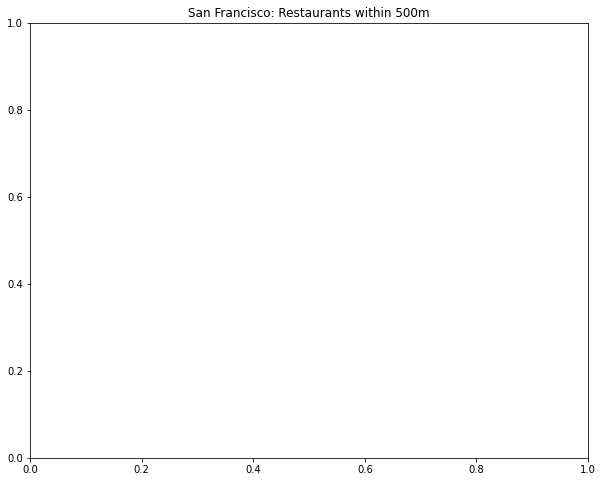

In [36]:
fig, ax = plt.subplots(figsize=(10,8))

plt.title('San Francisco: Restaurants within 500m')
plt.scatter(network.nodes_df.x, network.nodes_df.y, 
            c=accessibility, s=1, cmap='YlOrRd', 
            norm=matplotlib.colors.LogNorm())

cb = plt.colorbar()

plt.show()

# 4. OSMnx: OpenStreetMap + NetworkX

OSMnx is a Python library that lets you download spatial geometries and construct, project, and visualize street networks from OpenStreetMap's API.  It makes heavy use of the NetworkX library for network analysis.

https://www.openstreetmap.org  

OSMnx documentation: https://osmnx.readthedocs.io/en/stable/index.html  
OSMnx examples: https://github.com/gboeing/osmnx-examples/tree/master/notebooks

NetworkX documentation: https://networkx.github.io/documentation/stable/

In [37]:
conda config --prepend channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [38]:
conda create -n ox --strict-channel-priority osmnx y

Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install osmnx

Note: you may need to restart the kernel to use updated packages.


In [40]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import networkx as nx
import osmnx
print(osmnx.__version__)
osmnx.config(log_file=True, log_console=True, use_cache=True)

1.1.2


## 4.1. Download place boundaries

OSMnx makes it a little easier to download OSM data, especially non-network data like place boundaries or building footprints. See [this notebook](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/02-example-osm-to-shapefile.ipynb) for more detail.

In [41]:
city = osmnx.geocode_to_gdf('Manhattan, New York, New York, USA')
type(city)

/opt/anaconda3/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


geopandas.geodataframe.GeoDataFrame

In [42]:
city.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((-74.04722 40.69086, -74.04722 ...",40.880449,40.683941,-73.906159,-74.047222,283412835,relation,8398124,40.789624,-73.959894,"Manhattan, New York County, New York, United S...",boundary,administrative,1.185439


### 4.1.1. Reprojection

You can use any standard tools for plotting geodataframe geometries, but OSMNx also has some helper functions for handling projections and basic mapping. You will want to make sure you working with cartesian coordinates before performing any network analysis

In [43]:
# uses the optimal local UTM projection by default
osmnx.project_gdf(city).head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((580503.876 4504877.304, 580504...",40.880449,40.683941,-73.906159,-74.047222,283412835,relation,8398124,40.789624,-73.959894,"Manhattan, New York County, New York, United S...",boundary,administrative,1.185439


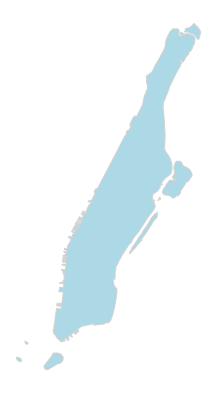

In [44]:
fig, ax = plt.subplots(figsize=(7,7))
osmnx.project_gdf(city).plot(fc='lightblue', ec='lightgrey', ax=ax)
_ = ax.axis('off')

### 4.1.2. Grab multiple places at once

/opt/anaconda3/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode

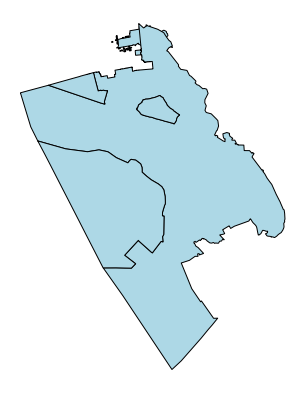

In [46]:
place_names = ['Berkeley, California, USA', 
               'Oakland, California, USA',
               'Piedmont, California, USA',
               'Emeryville, California, USA',
               'Alameda, Alameda County, CA, USA']

east_bay = osmnx.geocode_to_gdf(place_names)

fig, ax = plt.subplots(figsize=(7,7))
osmnx.project_gdf(east_bay).plot(fc='lightblue', ec='k', ax=ax)
_ = ax.axis('off')

### Exercise

Try downloading some other place outlines!

## 4.2. Download and process street networks

OSMnx lets you download street network data and build topologically-corrected street networks, project and plot the networks, and save the street network as SVGs, GraphML files, or shapefiles for later use. The street networks are directed and preserve one-way directionality. For a more in-depth demonstration of creating street networks, see [this notebook](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/03-graph-place-queries.ipynb).

Note that a **graph** is the math/computer science term for the data structure you probably think of as a "network": a set of vertices/nodes/points that are connected by edges/links/lines. More [here](https://en.wikipedia.org/wiki/Graph_(abstract_data_type)). This can be confusing because data visualizations are often called "graphs" as well; it seems like this originally referred only to network diagrams but has now expanded to include more things. Consider calling your data visualizations "charts" instead!

You can download a street network by providing OSMnx any of the following:
  - a bounding box
  - a lat-lon point plus a distance
  - an address plus a distance
  - a place name or list of place names (to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries

You can also specify several different network types:
  - 'drive' - get drivable public streets (but not service roads)
  - 'drive_service' - get drivable streets, including service roads
  - 'walk' - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
  - 'bike' - get all streets and paths that cyclists can use
  - 'all' - download all non-private OSM streets and paths (this is the default network type unless you specify a different one)
  - 'all_private' - download all OSM streets and paths, including private-access ones


### 4.2.1. Streets within a bounding box
 This constructs the network from all the OSM "nodes" (a.k.a. intersections or vertices) and "ways" (a.k.a. streets, edges, links, etc.) within the bounding box.

In [47]:
# define a bounding box
north, south, east, west = 37.79, 37.78, -122.41, -122.43

# create network from that bounding box
G1 = osmnx.graph_from_bbox(north, south, east, west, network_type='drive')
G1_projected = osmnx.project_graph(G1)

fig, ax = osmnx.plot_graph(G1_projected, bgcolor='none', node_color='red')
fig.show()

AttributeError: 'DataFrame' object has no attribute 'crs'

In [48]:
type(G1)

networkx.classes.multidigraph.MultiDiGraph

### 4.2.2. Street network by place name

In [49]:
G2 = osmnx.graph_from_place('Piedmont, California, USA')
G2_projected = osmnx.project_graph(G2)
fig, ax = osmnx.plot_graph(G2_projected, bgcolor='none', node_color='red')
fig.show()

/opt/anaconda3/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


AttributeError: 'DataFrame' object has no attribute 'crs'

In [ ]:
ec = osmnx.plot.get_edge_colors_by_attr(G2_projected, attr='length')
fig, ax = osmnx.plot_graph(
    G2_projected, bgcolor='none',
    node_color='w', node_edgecolor='k', node_size=1, node_zorder=3,
    edge_color=ec, edge_linewidth=3)
fig.show()

### 4.2.3. Street network within a distance radius

- This can be either a straight-line distance (implemented as a bounding box) or a network distance. 
- If it's a *driving* network, the network distances will respect one-way streets, but if it's a *walking* network, two-way travel is allowed everywhere.

In [50]:
# define a point at the corner of California St and Mason St in SF
location_point = (37.791427, -122.410018)

# create network only of nodes within 500m walking along the network from point
G3 = osmnx.graph_from_point(location_point, dist=500, dist_type='network', network_type='walk')
G3 = osmnx.project_graph(G3)

fig, ax = osmnx.plot_graph(G3, bgcolor='none', node_color='red')
fig.show()

AttributeError: 'DataFrame' object has no attribute 'crs'

### Exercise

Try getting a specific type of network for some place in the world -- (in the interest of time, don't get too big a city or other geography).  Try for walk vs drive vs some other type.

## 4.3. Converting networks and saving them to disk

Remember that the street networks are *not* GeoDataFrames -- they contain information about both **nodes** (points) and **edges** (lines). When you save them to geospatial formats like a Shapefile or GeoJSON, you'll need two separate files.

For more examples of saving and loading networks to/from disk, see [this notebook](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/05-save-load-networks.ipynb).

API documentation for [saving and loading](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.save_load)

### 4.3.1. Network Graph to Shapefile

In [ ]:
osmnx.save_graph_shapefile(G3, filepath='network-shape')

### 4.3.2. To GeoDataFrame, .csv, .geojson

In [ ]:
gdf_nodes, gdf_edges = osmnx.graph_to_gdfs(G3)

In [ ]:
gdf_nodes.head(3)

In [ ]:
gdf_edges.head(3)

In [ ]:
gdf_nodes.to_file('nodes.geojson', driver='GeoJSON')

### Exercise

Take one of the street networks we've loaded, convert its edges to a GeoDataFrame, and generate a list of all the street names.

Hint: the data types are a little messy, but something like this should work for the last step.

`gdf_edges['name'].astype('str').unique()`

## 4.4. Network analysis (topological and metric)

Network analysis is not all about shortest path calculations.  Network science is an entire field of analysis that exlores networks as mathematical / topological 'graphs'.  Also transportation planners use network structure information to inform analysis of travel behavior.  The 3Ds work by Cervero and Kockleman have evolved into 7Ds (or more) by researchers and practitioners trying to understand what urban design characteristics are associated with more walking and less driving.

Below we explore functionality that OSMnx offers, with considerable help from Networkx under the hood, to provide these kinds of calculations. 

For more depth, see [this notebook](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/06-stats-indicators-centrality.ipynb).

In [ ]:
osmnx.basic_stats(osmnx.graph_from_place('Piedmont, California, USA'))

## 4.4.1. Shortest path routing

Let the origin node be the node nearest the location and let the destination node just be the last node in the network. Then find the shortest path between origin and destination. The edges can be weighted in various different ways, but distance or travel time are the most common approaches.

In [ ]:
location_point = (37.791427, -122.410018)
G = osmnx.graph_from_point(location_point, dist=500, dist_type='network', network_type='walk')
origin_node = osmnx.get_nearest_node(G, location_point)

In [ ]:
destination_node = pd.Series(list(G.nodes())).sample().values[0]
route = nx.shortest_path(G, origin_node, destination_node)  # this is a NetworkX function
print(nx.shortest_path_length(G, origin_node, destination_node, weight='length'))
fig, ax = osmnx.plot_graph_route(G, route, bgcolor='none', node_color='none')
fig.show()

### Exercise

Pick an area of a city and download the OSM street graph for it. Choose two locations and find the shortest path between them!

Tip: One way to get lat-lon coordinates for arbitrary places is by right-clicking (or control-clicking) on a spot in Google Maps and choosing "What's here".

# 5. For next time

![](https://valhalla.readthedocs.io/en/latest/api/images/isochrone.png)
- Work through the OSMnx [isochrone demo notebook](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/13-isolines-isochrones.ipynb)
- Work through the UrbanAccess [demo notebook](https://github.com/UDST/urbanaccess/blob/dev/demo/simple_example.ipynb)
   - Pandana + GTFS for multi-modal accessibility